In [2]:
%pip install pandas statsmodels
import pandas as pd


[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1. Reading Data

For this section, you will implement the `read_songs()` function. This function will take in a string representing the path to a CSV file of songs and it should return a DataFrame containing all of those songs, one per row. You will not need to modify the path to the CSV that is passed into the function.

There are quite a lot of columns in the dataset! Here's a full list of them. 

```
"Track URI","Track Name","Artist URI(s)","Artist Name(s)","Album URI","Album Name","Album Artist URI(s)","Album Artist Name(s)","Album Release Date","Album Image URL","Disc Number","Track Number","Track Duration (ms)","Track Preview URL","Explicit","Popularity","ISRC","Added By","Added At","Artist Genres","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Time Signature","Album Genres","Label","Copyrights"
```
At the end of this writeup, there's a full description of the purpose of each column. We won't use all of them.

Pandas' `read_csv()` function allows you to create a DataFrame that contains the data stored inside of a given CSV file. The function has a huge number of options that you can pass in as *keyword arguments* in order to change how the CSV file is interpreted. You can review all of these options in [the Pandas documentation here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) In this case, `read_csv()` should get all of the data successfully with the default options, but the datatypes that it chooses may not always be the best ones. In particular, the `Album Release Date` column will be interpreted as a string by default. This is not "wrong", but it will make certain tasks more difficult later on. How you handle this is up to you—the following are three (of several possible) choices for how to handle this typing issue:
1. Choose a setting for `read_csv()` that forces Pandas to parse the column as a `datetime` object. (Less code but more documentation reading.)
2. Replace the column after reading the CSV by using [`to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html). In particular, you should be aware that some dates have Day, Month, and Year whereas some have just the Year. You could almost say that the format is *"mixed"...*(Less code but more documentation reading.)
3. Keep the column's type as a string and just parse out the year yourself. (Less reading but more code.)

Implement the `read_songs()` function. In Checkpoint 1, use the `head()` method to inspect the first few rows of your DataFrame and make sure that it looks OK!

In [3]:
def read_songs(filename):
    read_songs = pd.read_csv(filename)
    read_songs["Album Release Date"] = pd.to_datetime(read_songs["Album Release Date"], format = 'mixed')
    return read_songs

Use `head()` to inspect the first few rows of your DataFrame and make sure that it looks OK!

In [4]:
df = read_songs('medium.csv')
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights,0.2376100185
0,spotify:track:10QMwOs8ichrT1LIzDnlXD,Who Would You Be For Me,spotify:artist:1rCIEwPp5OnXW0ornlSsRl,Metric,spotify:album:1PedVMTwt52VHigoA1eqac,Who Would You Be For Me,spotify:artist:1rCIEwPp5OnXW0ornlSsRl,Metric,2023-09-08,https://i.scdn.co/image/ab67616d0000b273806707...,...,0.04570,0.092900,0.0827,0.301,135.953,4,NaN,"Metric Music International, Inc.","C (C) 2023 Metric Music International, Inc. ma...",NaN
1,spotify:track:5r882UNUUII5EKZ9rlVImU,Satellite,spotify:artist:1EI0B66miJj5Fl408B7E9H,Courtney Marie Andrews,spotify:album:1RzcWepHYgRdm07qC7CFjh,Satellite,spotify:artist:1EI0B66miJj5Fl408B7E9H,Courtney Marie Andrews,2022-06-08,https://i.scdn.co/image/ab67616d0000b273943284...,...,0.75600,0.000000,0.2060,0.285,77.038,4,NaN,Fat Possum,"C (C) 2022 Fat Possum Records, P (P) 2022 Fat ...",NaN
2,spotify:track:0HAqq2GcQKyi3s87GuN7jU,Amoeba,spotify:artist:3l0CmX0FuQjFxr8SK7Vqag,Clairo,spotify:album:32ium7Cxb1Xwp2MLzH2459,Sling,spotify:artist:3l0CmX0FuQjFxr8SK7Vqag,Clairo,2021-07-16,https://i.scdn.co/image/ab67616d0000b273262444...,...,0.79100,0.036600,0.1000,0.707,111.008,4,NaN,Republic Records,"C © 2021 Clairo Records, LLC, under exclusive ...",NaN
3,spotify:track:45wvsBV2S5VVstF6hTwnT8,Steps,spotify:artist:1GUaQ6GpaxFPKZ0SCSsnwD,Skullcrusher,spotify:album:6p67XlnmixLtfkSn0vwiiE,Storm in Summer,spotify:artist:1GUaQ6GpaxFPKZ0SCSsnwD,Skullcrusher,2021-04-09,https://i.scdn.co/image/ab67616d0000b273372225...,...,0.79000,0.000434,0.1060,0.120,110.000,4,NaN,Secretly Canadian,"C 2021 Secretly Canadian, P 2021 Secretly Cana...",NaN
4,spotify:track:7idKSs7LIXScVu6dLS5ieh,The Trapper's Pelts,spotify:artist:2h3ooJn8m8X8cL2g1BZ1Rd,Yard Act,spotify:album:6JXI3CvEjelCxeKZW3zndN,Dark Days,spotify:artist:2h3ooJn8m8X8cL2g1BZ1Rd,Yard Act,2021-01-19,https://i.scdn.co/image/ab67616d0000b273c8cd3a...,...,0.00742,0.087900,0.2730,0.672,98.130,4,NaN,Zen F.C.,"C 2021 Zen F.C, P 2021 Zen F.C",NaN


## 2. Exploratory Data Analysis

### A. What Does Your DataFrame Look Like?

It's important to understand the broad shape of the data you plan to work with: How much of it do you have? What columns does it consist of? Do any of these columns seem more or less useful? What values are typical in each of the columns?

In the following cells, you'll find a number of questions and space for you to answer them. The cells with the questions are **text cells,** meaning that what you write in them is not considered Python code. You can type whatever you want, just like you see here. There are also a few empty **code cells** that you can use to explore your DataFrame—`head()`, `shape`, `info()`, and `describe()` will all be useful here. When you submit this notebook, keep your work in these code cells! They show us how you answered the more general questions.

#### EDA Question 1:

*How many songs are in the `sharry_songs.csv` dataset? How many columns are there?*

**Answer:**

There are 4487 because that is the length of the column 'Track Name'. There are 35 columns because that is the second value returned when you use the shape function, which represents rows. 

In [5]:
# write pandas code here to answer this question!
ss = read_songs('sharry_songs.csv')
songs = ss['Track Name']
print(songs)
columns = ss.shape
print(columns)

0          Who Would You Be For Me
1                    Leonard Cohen
2       Man Proposes, God Disposes
3                      Doggg runnn
4                     I See Myself
                   ...            
4482              Everlasting Arms
4483                        Hudson
4484                   Worship You
4485                          Step
4486                   Unbelievers
Name: Track Name, Length: 4487, dtype: object
(4487, 35)


#### EDA Question 2:

*Are there any columns that are entirely or mostly empty?*

**Answer:**

Yes there are 2 because there are 2 columns that have only NaN values when performing the head() function.

In [6]:
# write pandas code here to answer this question!
empty = ss.empty
print(empty)
ss.head()
d = ss.describe()
print(d)

False
                  Album Release Date  Disc Number  Track Number   
count                           4487  4487.000000   4487.000000  \
mean   2009-07-19 02:54:54.316915712     1.017606      6.286829   
min              1964-10-01 00:00:00     1.000000      1.000000   
25%              2006-01-01 00:00:00     1.000000      3.000000   
50%              2011-05-16 00:00:00     1.000000      6.000000   
75%              2016-06-24 00:00:00     1.000000      9.000000   
max              2023-09-08 00:00:00     3.000000     31.000000   
std                              NaN     0.134878      4.286597   

       Track Duration (ms)   Popularity  Added By  Danceability       Energy   
count         4.487000e+03  4487.000000       0.0   4487.000000  4487.000000  \
mean          2.308179e+05    15.114553       NaN      0.477013     0.666793   
min           8.480000e+03     0.000000       NaN      0.000000     0.000000   
25%           1.815060e+05     0.000000       NaN      0.368000     0.

### B. Exploring Distributions

There are a bunch of columns included in this dataset that measure characteristics of the songs: `"Energy", "Danceability", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence"`. These columns all store numeric values between `0` and `1` measuring the degree to which each song represents the particular characteristic. For example, a song with a `"Danceability"` value of `0.9` would be highly "danceable", a song with a `"Valence"` of `0.1` will be very sad, and a song with an `"Instrumentalness"` score of `0.9` will have very few vocals. 

A quick way to get a picture of a Spotify user's taste from their song data would be to plot the distributions of each of these features as a bunch of histograms. The function `song_characteristics_distributions()`, which generates a "small multiples" visualization, is completed for you. You can run the cell below to define the function. The following cell calls that function on the `sharry_songs.csv` dataset.

In [7]:
def song_characteristics_distributions(df):
    """Generate a small-multiples plot consisting of histograms of the following song characteristics:
    - Energy
    - Danceability
    - Speechiness
    - Acousticness
    - Instrumentalness
    - Liveness
    - Valence
    Make sure the resulting plot meets the following requirements. Reading the pandas documentation for
    DataFrame.plot() will be helpful.
    - Give the overall collection of subplots a helpful title.
    - Arrange the plots in a 4x2 grid.
    - Each histogram should have 40 bins.
    - Make sure each histogram shares the same x-axis scale (from 0-1) with tick labels visible.
    - The overall plot should be big enough to read without overlapping subplots. 

    Args:
        df: a pandas.DataFrame
    """
    axes = df.plot(kind='hist', y=["Energy", "Danceability", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence"], bins=40, sharex=False, subplots=True, title='Listener Preferences', layout=(4, 2), figsize=(15,10))
    for row in axes:
        for ax in row:
            ax.set_ylabel(None)
            ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

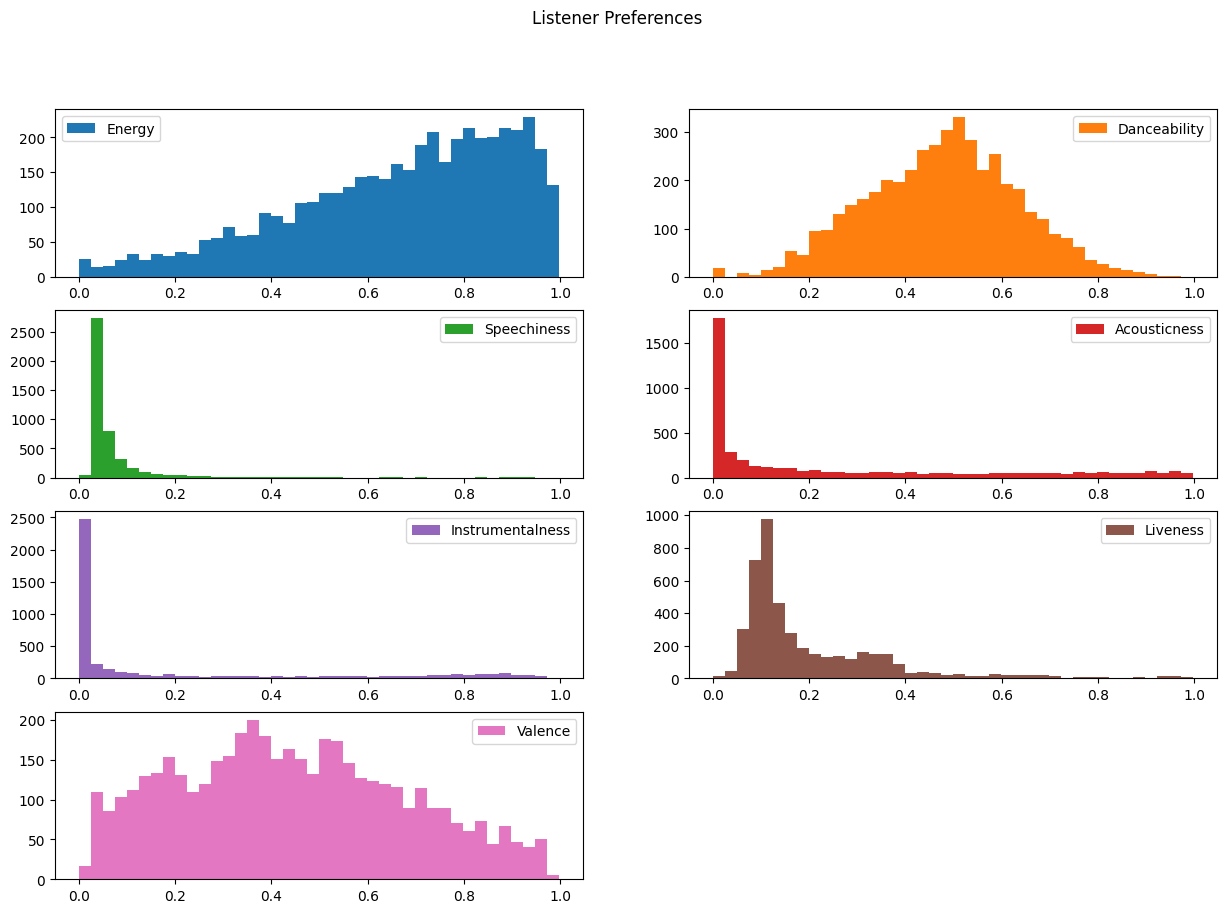

In [12]:
song_characteristics_distributions(read_songs("sharry_songs.csv"))

### EDA Question 3

*Based on the figures above, make a claim about Harry's apparent music preferences. Or, download your own data using the process outlined above, call the function on your own data, and make a claim about your own music preferences!*

Harry likes songs that are higher in energy.

## 3. Answering Questions

Once we understand what our data "looks like," we can formulate more specific questions that we'd like to ask about a user's library. 

Each of the following functions represents a kind of question you might ask about a user's library. Implement each of the functions. Keep in mind the Pandas function toolkit we've developed in class, and make sure to have [the Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html) close at hand.

There are also edge cases defined for each of the functions below. 

*The functions are presented in roughly increasing order of complexity. Aim to complete the first two in one or two lines. The following ones will require a bit more work.*

----

#### Standard Deviation Tools & Tips:

You'll probably find the [`.std()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html) function helpful here. Remember that you need to return the standard deviation of a single column, so you'll need to select the proper one before using `.std()`. 

In [8]:
def standard_deviation_of_energy(df):
    """Calculates the standard deviation of the energy values in the library.
    The standard deviation is defined as the square root of the average squared
    difference between each value and the mean. If the library is empty, return 0.
    Args:
        df: a pandas.DataFrame
    Returns:
        a float, the standard deviation of the energy values in the library.
    Tests:
    >>> standard_deviation_of_energy(read_songs('small.csv'))
    0.23676853811956278
    >>> standard_deviation_of_energy(read_songs('medium.csv'))
    0.23761001852234664
    >>> standard_deviation_of_energy(read_songs('sharry_songs.csv'))
    0.2304914250538867
    """
    if df.empty:
        return 0
    deviation = df['Energy'].std(0)
    return deviation
standard_deviation_of_energy(read_songs('medium.csv'))

0.23761001852234664

----

#### Songs Per Year Tools & Tips:

There are a few ways to approach this problem depending on what data type you're using for the `"Album Release Date"` column. 

**If you're using a `datetime` object**, then you can extract the year value from a `Series` with the [`dt.year` attribute](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html). The linked documentation has an illuminating example. Once you have each song's year, you can solve the problem in one or two more steps with either filtering or [`.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html). 

**If you're using a `str` object**, then you'll have to extract the year by parsing that out of the string. Inspect the column manually and see if you can identify which positions the year occupies in the date strings. (Is it the same for both date formats found in the file?) You can mimic typical Python string slicing (i.e. `s[start:stop:step]`) with the Pandas function [`str.slice()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) function. Once you have a way of isolating the year, the problem can be solved with filtering or `.value_counts()`.

In [9]:
def count_songs_from_year(df, year):
    """Counts the number of songs from a specific year in the library. If the library is empty, return 0.
    Bear in mind that the year argument is passed in as an integer. The "Album Release Date" column in the DataFrame
    Args:
        df: a pandas.DataFrame
        year: an int
    Returns:
        an int, the number of songs from the specified year.
    Tests:
    >>> count_songs_from_year(read_songs('small.csv'), 2015)
    4
    >>> count_songs_from_year(read_songs('medium.csv'), 2018)
    14
    >>> count_songs_from_year(read_songs('sharry_songs.csv'), 2020)
    78
    """
    the_year = df['Album Release Date'].dt.year
    return (the_year == year).sum()
count_songs_from_year(read_songs('small.csv'), 2015)

4

#### Popularity Range Tools & Tips:

There are a bunch of ways to solve this one. A crucial element of the problem is excluding those rows with popularity values of `0`, and that can be done with a standard filter. 

To calculate the range, you need the biggest and smallest values in the series. You could get this by calling [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html) on a Series and then using [`.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.Series.iloc.html) to access the proper values. Or maybe there are some other functions that might help: [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html) and [`min()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.min.html), perhaps?

In [10]:
def calculate_popularity_range(df):
    """Calculate the range of popularity values in the library.
    Ignore all songs with popularity value of 0. (This is a placeholder value for songs with unknown popularity.)
    If the library is empty, return -1.
    Args:
        df: a pandas.DataFrame
    Returns:
        an int, the range of popularity values in the library (highest popularity - lowest popularity)
    Tests:
    >>> calculate_popularity_range(read_songs('small.csv'))
    29
    >>> calculate_popularity_range(read_songs('medium.csv'))
    76
    >>> calculate_popularity_range(read_songs('sharry_songs.csv'))
    92
    """
    if df.empty:
        return -1
    pop = df['Popularity']
    pop_nonzero = pop[pop != 0]
    return pop_nonzero.max() - pop_nonzero.min()
calculate_popularity_range(read_songs('medium.csv'))

76

#### Song Name with Most Genres Tools & Tips:

Think back to counting bus routes to NYC schools from 10/16, but with genres instead of songs. Note that the `"Artist Genres"` column stores strings the genres separated by commas. As a reminder, here are some important string/list processing functions in Pandas. You won't need all of them.

- [`str.count(substring)`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.count.html) counts the occurrences of a substring in a string
- [`str.contains(substring)`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html) returns `True` if the substring is present in the larger string in that cell
- [`str.split(sep)`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) splits the string into a list of substrings separated by `sep`
- [`str.len()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.len.html) finds the length of the string (or list!) in this cell and returns it as a number

Keep in mind that you need to break ties by selecting the song that appears closer to the top of the `DataFrame`. When you filter rows out of a `DataFrame`, the order of the rows is otherwise preserved. You can use this to your advantage. 

In [11]:
def song_name_with_most_genres(df):
    """Finds the song with the most genres in the library and returns its name.
    If the library is empty, return None.
    If there are multiple songs with the same number of genres, return the one that appears earlier in the library.
    Args:
        df: a pandas.DataFrame
    Returns:
        a string, the name of the song with the most genres.
    Tests:
    >>> song_name_with_most_genres(read_songs('small.csv'))
    'Give Your Heart Away'
    >>> song_name_with_most_genres(read_songs('medium.csv'))
    'american dream'
    >>> song_name_with_most_genres(read_songs('sharry_songs.csv'))
    '...And The World Laughs With You'
    """
    genres = df['Artist Genres'].str.split(',').str.len()
    highest = df[genres == genres.max()]
    return highest.iloc[0]['Track Name']
song_name_with_most_genres(read_songs('medium.csv'))

'american dream'

#### Song Name with Most Genres Tools & Tips:

This problem deals with string processing again, so here are some important string/list processing functions in Pandas. You won't need all of them.

- [`str.count(substring)`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.count.html) counts the occurrences of a substring in a string
- [`str.contains(substring)`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html) returns `True` if the substring is present in the larger string in that cell
- [`str.split(sep)`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) splits the string into a list of substrings separated by `sep`
- [`str.len()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.len.html) finds the length of the string (or list!) in this cell and returns it as a number

🤯 [Exploding](https://pandas.pydata.org/docs/reference/api/pandas.Series.explode.html) the `DataFrame` might be useful. Remember that this function works by expanding the `DataFrame` to include many "duplicate" rows, creating each one of these duplicates for each value in the list cell that's being exploded. The example from 10/18 may be helpful here. There are probably half a dozen ways of doing this, though, so you may have some luck perusing the Pandas documentation to find an answer. Just keep in mind that you want to match on **full artist names.** If I'm searching for songs by `"Future"`, you should not return any songs by the artist `"Future Islands"`.

In [12]:
def find_songs_with_artist(df, artist):
    """Selects all songs by a specific artist in the library.
    Keep in mind that a song may have many artists. The song
    should be included in the output if *any* of its artists
    match the input. You should not modify the input DataFrame, but
    you can create a copy using the .copy() method.
    If the library is empty, the DataFrame returned should be empty.
    Args:
        df: a pandas.DataFrame
        artist: a string
    Returns:
        a DataFrame containing only songs featuring the specified artist.
    Tests:
    >>> find_songs_with_artist(read_songs('medium.csv'), 'Slash').shape[0]
    2
    >>> find_songs_with_artist(read_songs('medium.csv'), 'Slash')['Track Name'].iloc[0]
    'Starlight (feat. Myles Kennedy)'
    >>> find_songs_with_artist(read_songs('medium.csv'), 'Slash')['Track Name'].iloc[1]
    'Watch This'
    >>> find_songs_with_artist(read_songs('sharry_songs.csv'), 'Phoebe Bridgers').shape[0]
    13
    >>> find_songs_with_artist(read_songs('sharry_songs.csv'), 'Phoebe Bridgers')['Track Name'].iloc[0]
    'Leonard Cohen'
    >>> find_songs_with_artist(read_songs('sharry_songs.csv'), 'Phoebe Bridgers')['Track Name'].iloc[1]
    'Motion Sickness'
    >>> find_songs_with_artist(read_songs('sharry_songs.csv'), 'Phoebe Bridgers')['Track Name'].iloc[12]
    'Dominos'
    """
    if df.empty:
        return df.copy()
    copy = df.copy()
    copy['Artist List'] = copy['Artist Name(s)'].str.split(',')
    copy = copy.explode('Artist List')
    copy['Artist List'] = copy['Artist List'].str.strip().str.lower()
    match = copy['Artist List'] == artist.lower()
    return copy.loc[match, df.columns].copy()
find_songs_with_artist(read_songs('sharry_songs.csv'), 'Phoebe Bridgers').shape[0]

13

## 4. Tracking Genres over Time

Spotify has a huge set of music genres that it uses to tag each song. Some of the genres they use are remarkably specific ("duluth indie"), totally obtuse ("bubblegrunge"), or just plain silly ("y'alternative" 🤠). It's possible to get a sense of what a genre is supposed to refer to by listening to songs tagged with it, but it's also useful to understand the genres in the context of the timeframe from which its constituent songs come. Furthermore, many genres of music evolve significantly over time—compare Future to Run-DMC or Johnny Cash to Florida Georgia Line, for example. 

For this next task, help by completing the `genre_frequency_over_time()` function to generate a bar chart counting the number of songs matching a given genre in all years between its first appearance in the dataset to its last. The chart must be a bar chart with a title **that displays the name of the genre** and helpful x- and y- axes labels. (You can make it look nicer if you like—coloring the bars by release year could be a lot of fun!) By using [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html), you should be able to finish this task in just one or two additional lines of code. Keep in mind that `by_year`—the data you should be plotting—is a `Series`, so you won't need to specify the columns to use for the x and y dimensions.

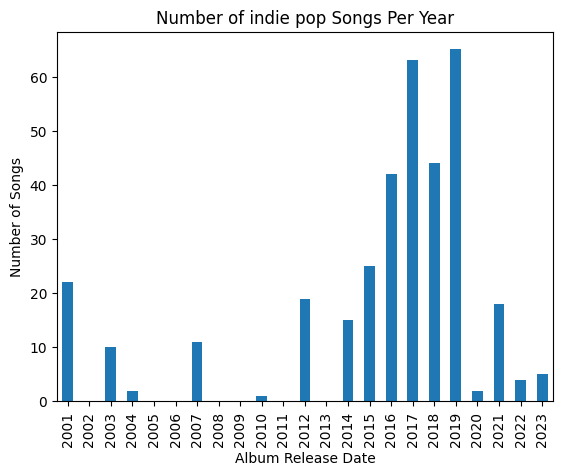

In [13]:
def genre_frequency_over_time(df, genre):
    """Generate a bar plot showing the number of songs of a specific genre by year.
    The x-axis should be the year, and the y-axis should be the number of songs.
    The first year and last years should be the first and last years that the genre
    appears in the library. All intermediate years should be included, even if there are no songs
    with that genre in that year. reindex() is useful for this.
    Make sure to add axis labels and a title that mentions the name of the genre being plotted.
    Args:
        df: a pandas.DataFrame
        genre: a string
    Returns:
        None
    """
    copied = df.copy()
    copied["Artist Genres"] = copied["Artist Genres"].str.split(",")
    exploded = copied.explode('Artist Genres')
    exploded = exploded[exploded["Artist Genres"] == genre]

    exploded["Album Release Date"] = pd.to_datetime(exploded["Album Release Date"], format="mixed")
    by_year = exploded.groupby(exploded["Album Release Date"].dt.year).size()
    by_year = by_year.reindex(range(by_year.index.min(), by_year.index.max() + 1), fill_value=0)
    by_year.plot(kind = 'bar', title = f"Number of {genre} Songs Per Year", ylabel = "Number of Songs")

genre_frequency_over_time(read_songs('sharry_songs.csv'), 'indie pop')

This cell here runs all of the tests that are encoded into the function docstrings above. It's a nice way of testing your output. You can add your own tests, too.

In [14]:
import doctest
doctest.testmod(verbose=True)

Trying:
    calculate_popularity_range(read_songs('small.csv'))
Expecting:
    29
ok
Trying:
    calculate_popularity_range(read_songs('medium.csv'))
Expecting:
    76
ok
Trying:
    calculate_popularity_range(read_songs('sharry_songs.csv'))
Expecting:
    92
ok
Trying:
    count_songs_from_year(read_songs('small.csv'), 2015)
Expecting:
    4
ok
Trying:
    count_songs_from_year(read_songs('medium.csv'), 2018)
Expecting:
    14
ok
Trying:
    count_songs_from_year(read_songs('sharry_songs.csv'), 2020)
Expecting:
    78
ok
Trying:
    find_songs_with_artist(read_songs('medium.csv'), 'Slash').shape[0]
Expecting:
    2
ok
Trying:
    find_songs_with_artist(read_songs('medium.csv'), 'Slash')['Track Name'].iloc[0]
Expecting:
    'Starlight (feat. Myles Kennedy)'
ok
Trying:
    find_songs_with_artist(read_songs('medium.csv'), 'Slash')['Track Name'].iloc[1]
Expecting:
    'Watch This'
ok
Trying:
    find_songs_with_artist(read_songs('sharry_songs.csv'), 'Phoebe Bridgers').shape[0]
Expecting:


TestResults(failed=0, attempted=19)

# 5. What Is My Kind of Song?

For the final part of this assignment, you are given a model that is designed to estimate the probability of whether some **new** song would fit into my library or not. You are tasked with running some cells here and thinking critically about the model as it has been described. You will not write code here, but you will have to answer a few open-ended questions and provide some justification. 

The main hypothesis that drives the model we have built is that the songs that I have saved to my library might tend to fit a certain profile. Maybe my taste is, for example, happy, high-energy, acoustic-sounding music. In order to prove that, it will be important to have examples of songs that are not currently among my Liked Songs. 

These come from an anonymous friend—let's call her "E"—and are found in the file called `other_songs.csv`. By introducing songs that come from another library—from another person with a different taste for music—we might introduce some examples that have notably different musical profiles. This will give our model a notion of what music outside of my personal taste might look like so that it can learn to identify examples of it. Then, the model will be tasked with estimating the probability that a song with a certain profile comes from my library instead of E's library.

The model is actually built using the steps outlined in the included `building_a_model.ipynb`. You do not have to read anything or run any code found in that notebook, but it does show you how the model is built if you're curious. We can load the model using the following cell:

In [15]:
import pickle

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# This will print a summary of the model, which helps to confirm that
# the model was loaded correctly. For more info on some of these numbers,
# you can check out building_a_model.ipynb
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  harry   No. Observations:                 5835
Model:                          Logit   Df Residuals:                     5827
Method:                           MLE   Df Model:                            7
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                  0.1712
Time:                        19:16:54   Log-Likelihood:                -2613.8
converged:                       True   LL-Null:                       -3153.8
Covariance Type:            nonrobust   LLR p-value:                5.789e-229
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.1849      0.213     10.273      0.000       1.768       2.602
Energy               2.4853      0.226     10.997      0.000       2.042       2.928
Danceability        -3.5034      0.255    -13.763      0.000      -4.002      -3.005
Speechiness         -4.1893      0.438     -9.574      0.000      -5.047      -3.332
Acousticness        -0.8345      0.150     -5.580      0.000      -1.128      -0.541
Instrumentalness     1.6393      0.144     11.392      0.000       1.357       1.921
Liveness             0.3013      0.236      1.278      0.201      -0.161       0.763
Valence             -0.7190      0.179     -4.024      0.000      -1.069      -0.369
====================================================================================
"""

Let's see how well the model works on three different songs that I do really like, but that are not present in `sharry_songs.csv`. In each case, I have queried Spotify to get the song features for these songs and copied them manually into three individual DataFrames. Make sure to run the following cell.

In [16]:
dirty_laundry = pd.DataFrame({
  "Track Name": "Dirty Laundry",
  "Artist Name(s)" : "Cayetana",
  "Acousticness": 0.0021,
  "Danceability": 0.319,
  "Energy": 0.892,
  "Instrumentalness": 0.0528,
  "Liveness": 0.187,
  "Speechiness": 0.054,
  "Valence": 0.749
}, index=[0])

unlimited_love = pd.DataFrame({
    "Track Name": "Unlimited Love",
    "Artist Name(s)": "thanks for coming",
  "Acousticness": 0.574,
  "Danceability": 0.851,
  "Energy": 0.537,
  "Instrumentalness": 0,
  "Liveness": 0.302,
  "Speechiness": 0.0525,
  "Valence": 0.965,
  "track_href": "https://api.spotify.com/v1/tracks/7I8DFjHKnjZP2ExgK5gqHK"
}, index=[0])

red_wine_supernova = pd.DataFrame({
    "Track Name": "Red Wine Supernova",
    "Artist Name(s)": "Chappell Roan",
    "Acousticness": 0.0176,
    "Danceability": 0.657,
    "Duration_ms": 192721,
    "Energy": 0.82,
    "Instrumentalness": 0,
    "Liveness": 0.0847,
    "Speechiness": 0.0441,
    "Valence": 0.709,
    "track_href": "https://api.spotify.com/v1/tracks/7FOgcfdz9Nx5V9lCNXdBYv"
}, index=[0])


We can ask what the model thinks about the probability of each song being mine by calling the `predict()` method:

In [16]:
model.predict(dirty_laundry)

0    0.93466
dtype: float64

The model estimates a $93\%$ probability that this song is one of mine instead of being one of E's. That is a fair bet in this case—I think that the [lo-fi indie punk sound](https://www.youtube.com/watch?v=z0DKtKTQaL0) is one that I like much more than her. OK, so what about the next one?

In [17]:
model.predict(unlimited_love)

0    0.317843
dtype: float64

Well, ["Unlimited Love"](https://www.youtube.com/watch?v=1buPD4MGslA) is a recent favorite song of mine, but the model seems to think it's more likely to be one of E's songs! (Only a $31.8\%$ of being mine, so a $68.2\%$ chance of being hers...) Curious—it doesn't feel so far off from a lot of stuff I like, but perhaps it's statistically more like E's music.

How about the last one? It's a little out of my wheelhouse, but I've been enjoying [this Chappell Roan song](https://www.youtube.com/watch?v=y9Wxl9Q9lUQ) recently. Let's see what the model thinks about the chances of it being one of mine instead of one of E's.

In [18]:
model.predict(red_wine_supernova)

0    0.77511
dtype: float64

OK, so not so surprising to the model that I would like the song—apparently it's got a $77.5\%$ chance of being mine instead of E's. But wait a second... E actually beat me to the punch in this case, and the song is already present in her library! We actually told the model that "Red Wine Supernova" is one of E's songs when we were teaching it the difference between my songs and hers. This reveals one of the challenges of probabilistic models trained on lots of data: models like this are responsible for capturing large, overarching patterns, and so the model can learn patterns that contradict individual examples. 

## Questions

Please answer the following questions and give your best answer. You are encouraged to keep your answer to just a few sentences in each case, but you should make sure to give your answer some justification. These questions are designed to get you thinking about the use of statistical models built on personal data. There are several acceptable answers to each question, and an answer need not be absolutely "correct" in order to be considered acceptable. You are welcome to discuss these questions with a partner, but if you do, you must cite each other and also **describe your discussion:** Did you come to the same conclusion? Did you propose two different answers?

### Q1

In order to train our model, we needed examples of songs that were "Harry Songs" and "not Harry Songs." How did we find examples of "not Harry Songs?" What are the implications of the "not Harry Songs" that we used for the kinds of conclusions that we can draw based on this model?

"not Harry Songs" were songs that came from the anonymous friend "E" and were in the other_songs.csv library. The characteristics of those songs were compared to characteristics of the songs that were "Harry Songs" so the model could get an idea of what songs outside of Harry's taste looked like. Then the model compared the characteristics of each song it tested with Harry's songs and other songs to determine if it fit into Harry's taste. However, "not Harry Songs" just came from a singular person's data, so the results generated could be inaccurate. For example, if a song is Harry's preference but is more E's preference, the model would determine that it is not Harry's preference. Therefore, the model more so determines if a song is more E's preference or Harry's rather than comparing it to songs in general.

### Q2

Notice that when we call the `predict()` function from our model, we get a `float` representing the probability of a song being a "Harry Song." Why might it be a good thing that the model outputs *probabilities* and not *booleans/"yes or no"* answers?

The model is a prediction, so it cannot be 100% sure that a song will or will not fit Harry's taste. Therefore, it gives a probablity rather than a concrete yes/no answer. This is more informative than just a yes/no answer as a .51 probability and .99 probability would both result in the same answer, even though they have very different implications on how much Harry would like that song.

### Q3

Reflect on the results of the three predictions we asked the model to make. Do they make you feel that the model is trustworthy or untrustworthy, or do you feel that you don't have enough information? How could we get a better sense of how good the model actually is? 

I feel like I don't have enough information to decide whether it is trustworthy or not. Some of the predictions were accurate, while others were not. The 3rd prediction, for example, was inaccurate as the song was already on E's playlist, but the song also fit in Harry's taste so it made sense for the model to predict it would be in Harry's. We could get a better sense of how good the model is by comparing Harry's taste to a different playlist that wasn't used in training the model and assess if the model makes accurate predictions.

### Q4

Conclude this assignment by making a suggestion about how we could make this model *better.* ("Better" is a subjective term that could have plenty of meanings in this case, so please explain in what way you think your suggestion will actually make things better!)

The model would definitely be more accurate if it were comparing Harry's songs to a larger and more diverse dataset, rather than just E's songs. Comparing it to E's songs makes it so the model predicts whether a song is more closer to E's taste or Harry's taste, which is a limited comparison. If the model were to compare Harry's songs to a broader data set with a variety of listeners with different tastes, the prediction on whether or not a song fits Harry's taste would be much more accurate. 

## Readme

### How much time did you spend on this assignment?

Approximately 5 hours.

### What was the most challenging aspect of this assignment?

The most challenging aspect was writing some of the functions.

### Please list all sources you used to complete this assignment. (You can leave out TA & Instructor help on Ed and in Office Hours.) Name your collaborators for Part 5 here too.

Just the pandas documentation.